In [1]:
from twitterscraper import main
from twitterscraper import query
from twitterscraper import tweet
import pandas as pd
import numpy as np
from twitterscraper import query_tweets

In [2]:
from __future__ import division
import random
import requests
import datetime as dt
import json
from functools import partial
from multiprocessing.pool import Pool

from twitterscraper.tweet import Tweet

In [3]:
from konlpy.tag import *

In [4]:
twitter = Twitter()

C:\Users\sora\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
#  query_tweets(query, limit = None, begindate = dt.date(2006,3,21), enddate=dt.date.today(), poolsize=20, lang='')
if __name__ == '__main__':
    # 2019 03 08-2019 03 09 공기청정기와 미세먼지  언급된 tweet 찾음
    list_of_tweets = query_tweets("공기청정기 미세먼지", begindate = dt.date(2019,3,8) ,  enddate=dt.date(2019,3,9), poolsize =50)

    #하나씩 print
    for tweet in query_tweets("공기청정기 미세먼지", begindate = dt.date(2019,3,8),enddate=dt.date(2019,3,9), poolsize = 50):
        print(tweet)

INFO: queries: ['공기청정기 미세먼지 since:2019-03-08 until:2019-03-09']
INFO: Got 130 tweets (130 new).
INFO: queries: ['공기청정기 미세먼지 since:2019-03-08 until:2019-03-09']
INFO: Got 130 tweets (130 new).


In [6]:
text=""

In [7]:
#200개 정도만 분석
for i in range((len(list_of_tweets))) :
    text+=(list_of_tweets[i].text)

In [8]:
text

'ㅇㅋ\nㅋㅋㅋ\nㅋ\nㅋㅋ\nㅋㅋㅋ 아진짜요?? 나 탈한국할래.. 한국인들 외국가면 공부 잘할거같애요 이 인간들 인간이 아님... 아니 전..아니난죽게해줘... 한국 교육열 제발 그만~~ 미세먼지 오지는데... 시교육청이 초등학교만 공기청정기 주고 중고등학교 아직도 공기청정기도 없어요“중국산 미세먼지에 샤오미 공기청정기 안돼” 반중 불매운동 확산\n출처 : 국민일보 | 네이버\n http://naver.me/GbKdPDrL\xa0시리얼먹구 머리말리고 바로가야지 얼굴부워서 얼굴이 무거웤ㅋㅋ\n\n그나마 미세먼지 좀 물러났다고 숨쉬기편하게 잤다.  미쳤어증말 공기청정기사야한다 비염인의 필수생존템;;;(점막손상으로코피로죽는건가출혈\n\n아님 콧구멍 혈관을 어캐(검열)해야하나 넘성가심;택배하는사람입니다 \n\n이번주 배달 물량중 가장많이 \n늘어난 제품이 무엇일까요\n\n제가 느끼기에 가장 늘어난건\n\n마스크와 공기청정기가 많이\n늘었습니다 \n\n그만큼 미세먼지의 심각성을\n느끼는 분들이 많은거겠죠\n\n시간이 좀더지나면 황사까지 올텐데\n외부에서 일하는 분들 건강에\n유의하세요박원숭 미세먼지 페인트 뉴스보니 옥상양봉 생각나네 지긋지긋하다 하긴 공기청정기 설치하란 사람이나..하는 짓을 보면 대가리에 든 게 없는 게 맞는 것 같다.\n이 너른 천지에 공기청정기로 미세먼지를 막아낸다니\n상식적으로 도저히 이해가 되지 않는다.\n차리 그 돈으로 모든 국민들에게 KF마스크를 배부하는 게 훨 낫지 않은가?국민여러분 미세먼지가 많습니다 방독면사십쇼 공기청정기 사십쇼우리 회사더 공기청정기 있지만 건물 밖에 나오면 미세먼지 잔뜩 있잖아ㅋㅋㅋㅋㅋ그래서 요즘에 목도 안 좋고, 눈도 뭔가 따가워ㅋㅋㅋㅋㅋ나 감기 두 달 정도 안 낫고 있어. 그래도 봄이라 좀 나아졌는데, 겨울엔 너무 힘들었다 ㅋㅋㅋㅋㅋ애기는 괜찮아?요즘 미세먼지 엄청나게 많죠... 인천이 가장 많다는데 ㅠㅠ 그래도 학교에는 공기청정기 많이 설치해줘서 다행이지만! 미세먼지 조심하세요 ㅠㅠ#스모그 #공해 #매연 #마스크

In [9]:
# 특정 요소만 제외하고 싶을 때, 
# 한글 처리시 유용
def make_corpus_rm_stopwords(text):
    corpus = []
    for s in text.split('\n'):
        # 지정된 요소 아닌 것들만.
        corpus.append(['/'.join(p) for p in twitter.pos(s) if (p[1] not in["Josa","Punctuation","URL"])])
    return corpus

In [10]:
corpus = make_corpus_rm_stopwords(text)
corpus

[['ㅇㅋ/KoreanParticle'],
 ['ㅋㅋㅋ/KoreanParticle'],
 ['ㅋ/KoreanParticle'],
 ['ㅋㅋ/KoreanParticle'],
 ['ㅋㅋㅋ/KoreanParticle',
  '아/Exclamation',
  '진짜/Noun',
  '나/Noun',
  '탈/Noun',
  '한국/Noun',
  '할래/Verb',
  '한국/Noun',
  '외국/Noun',
  '가면/Noun',
  '공부/Noun',
  '잘/VerbPrefix',
  '할거/Verb',
  '같/Adjective',
  '애/Noun',
  '이/Noun',
  '인간/Noun',
  '들/Suffix',
  '인간/Noun',
  '아님/Adjective',
  '아니/Adjective',
  '전/Noun',
  '아니난/Adjective',
  '죽게/Verb',
  '해줘/Verb',
  '한국/Noun',
  '교육/Noun',
  '열/Noun',
  '제발/Noun',
  '그만/Adverb',
  '미세먼지/Noun',
  '오지는데/Verb',
  '시/Modifier',
  '교육청/Noun',
  '초등학교/Noun',
  '공기청정기/Noun',
  '주고/Verb',
  '중/Noun',
  '고등학교/Noun',
  '아직도/Adverb',
  '공기청정기/Noun',
  '없어요/Adjective',
  '“/Foreign',
  '중국산/Noun',
  '미세먼지/Noun',
  '샤오미/Noun',
  '공기청정기/Noun',
  '안/VerbPrefix',
  '돼/Verb',
  '”/Foreign',
  '반중/Noun',
  '불매운동/Noun',
  '확산/Noun'],
 ['출처/Noun', '국민일보/Noun', '네이버/Noun'],
 ['\xa0/Foreign',
  '시리얼/Noun',
  '먹구/Verb',
  '머리/Noun',
  '말리/Noun',
  '바로/Noun',
  '가야/Nou

## Train

In [11]:
from gensim.models import Word2Vec, fasttext

In [12]:
# window size=2, 핵심단어 주변 2개 추출, 2차원으로 표시
Skip_Gram_model = Word2Vec(corpus, size=2, window=2, min_count=2, workers=2, iter=1000, sg=1)

In [13]:
words = Skip_Gram_model.wv.index2word
words

['미세먼지/Noun',
 '공기청정기/Noun',
 '\xa0/Foreign',
 '#공기청정기/Hashtag',
 '들/Suffix',
 '#미세먼지/Hashtag',
 '마스크/Noun',
 '적/Suffix',
 '하는/Verb',
 '#공해/Hashtag',
 '#매연/Hashtag',
 '#마스크/Hashtag',
 '#SUV/Hashtag',
 '#노후차/Hashtag',
 '#배출가스/Hashtag',
 '#자연보호/Hashtag',
 '#대기오염/Hashtag',
 '#환경오염/Hashtag',
 '#발암물질/Hashtag',
 '#유해물질/Hashtag',
 '#역학조사/Hashtag',
 '#집단소송제/Hashtag',
 '징벌/Noun',
 '손해배상/Foreign',
 '중국/Noun',
 '우리/Noun',
 '이/Noun',
 '안/Noun',
 '공기/Noun',
 '다/Adverb',
 '거/Noun',
 '강/Noun',
 '진짜/Noun',
 '나/Noun',
 '인간/Noun',
 '사람/Noun',
 '설치/Noun',
 '학교/Noun',
 '대책/Noun',
 '내/Noun',
 '때/Noun',
 '집/Noun',
 '보급/Noun',
 '다니엘/Noun',
 '뉴스/Noun',
 '것/Noun',
 '너무/Adverb',
 '…#스모그/Hashtag',
 '오늘/Noun',
 '저/Determiner',
 '정화/Noun',
 '하나/Noun',
 '같은/Adjective',
 '해서/Verb',
 '안/VerbPrefix',
 '좀/Noun',
 '많이/Adverb',
 '건강/Noun',
 '돈/Noun',
 '국민/Noun',
 '더/Noun',
 '요즘/Noun',
 'ㅠㅠ/KoreanParticle',
 '말/Noun',
 '#스모그/Hashtag',
 '정부/Noun',
 '하/Suffix',
 '할/Verb',
 '교실/Noun',
 '구매/Noun',
 '운영/Noun',
 '반/Noun',
 '1/N

In [14]:
vectors = Skip_Gram_model.wv.vectors
#각 단어들의 vector가 나온다.
vectors

array([[-9.35859025e-01, -2.46038243e-01],
       [-9.19170499e-01, -2.83696264e-01],
       [-7.36829996e-01,  5.99992990e-01],
       [-1.72196758e+00,  2.00684595e+00],
       [-9.05052125e-01, -8.69864076e-02],
       [-2.21579170e+00,  2.67144728e+00],
       [-7.90047407e-01,  3.63811880e-01],
       [-1.28128541e+00,  1.44328082e+00],
       [-1.08026540e+00, -4.25422013e-01],
       [-3.34811282e+00,  4.05156374e+00],
       [-3.63592005e+00,  4.39896536e+00],
       [-3.73682547e+00,  4.54741526e+00],
       [-3.81733489e+00,  4.64105225e+00],
       [-3.89512444e+00,  4.72920656e+00],
       [-4.02903509e+00,  4.84902668e+00],
       [-4.02363062e+00,  4.87760925e+00],
       [-4.03775597e+00,  4.89222717e+00],
       [-3.86724401e+00,  4.69885445e+00],
       [-3.69160080e+00,  4.45938015e+00],
       [-3.38229060e+00,  4.08220196e+00],
       [-3.07680154e+00,  3.70629168e+00],
       [-2.61369491e+00,  3.12984657e+00],
       [-2.39208484e+00,  2.84427738e+00],
       [-1.

In [15]:
Skip_Gram_model_result = dict(zip(words, vectors))

In [16]:
Skip_Gram_model.most_similar('미세먼지/Noun', topn=5)

C:\Users\sora\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('진짜/Noun', 0.9999904036521912),
 ('대가리/Noun', 0.999973714351654),
 ('틀/Noun', 0.9999321103096008),
 ('회사/Noun', 0.9999097585678101),
 ('보고/Noun', 0.9998922944068909)]

In [17]:
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,미세먼지/Noun,-0.935859,-0.246038
1,공기청정기/Noun,-0.919170,-0.283696
2,/Foreign,-0.736830,0.599993
3,#공기청정기/Hashtag,-1.721968,2.006846
4,들/Suffix,-0.905052,-0.086986
5,#미세먼지/Hashtag,-2.215792,2.671447
6,마스크/Noun,-0.790047,0.363812
7,적/Suffix,-1.281285,1.443281
8,하는/Verb,-1.080265,-0.425422
9,#공해/Hashtag,-3.348113,4.051564


In [18]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
import matplotlib.font_manager as fm
font_list=fm.findSystemFonts(fontpaths=None,fontext='ttf')
plt.rcParams["font.family"] = "NanumGothic"


In [19]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

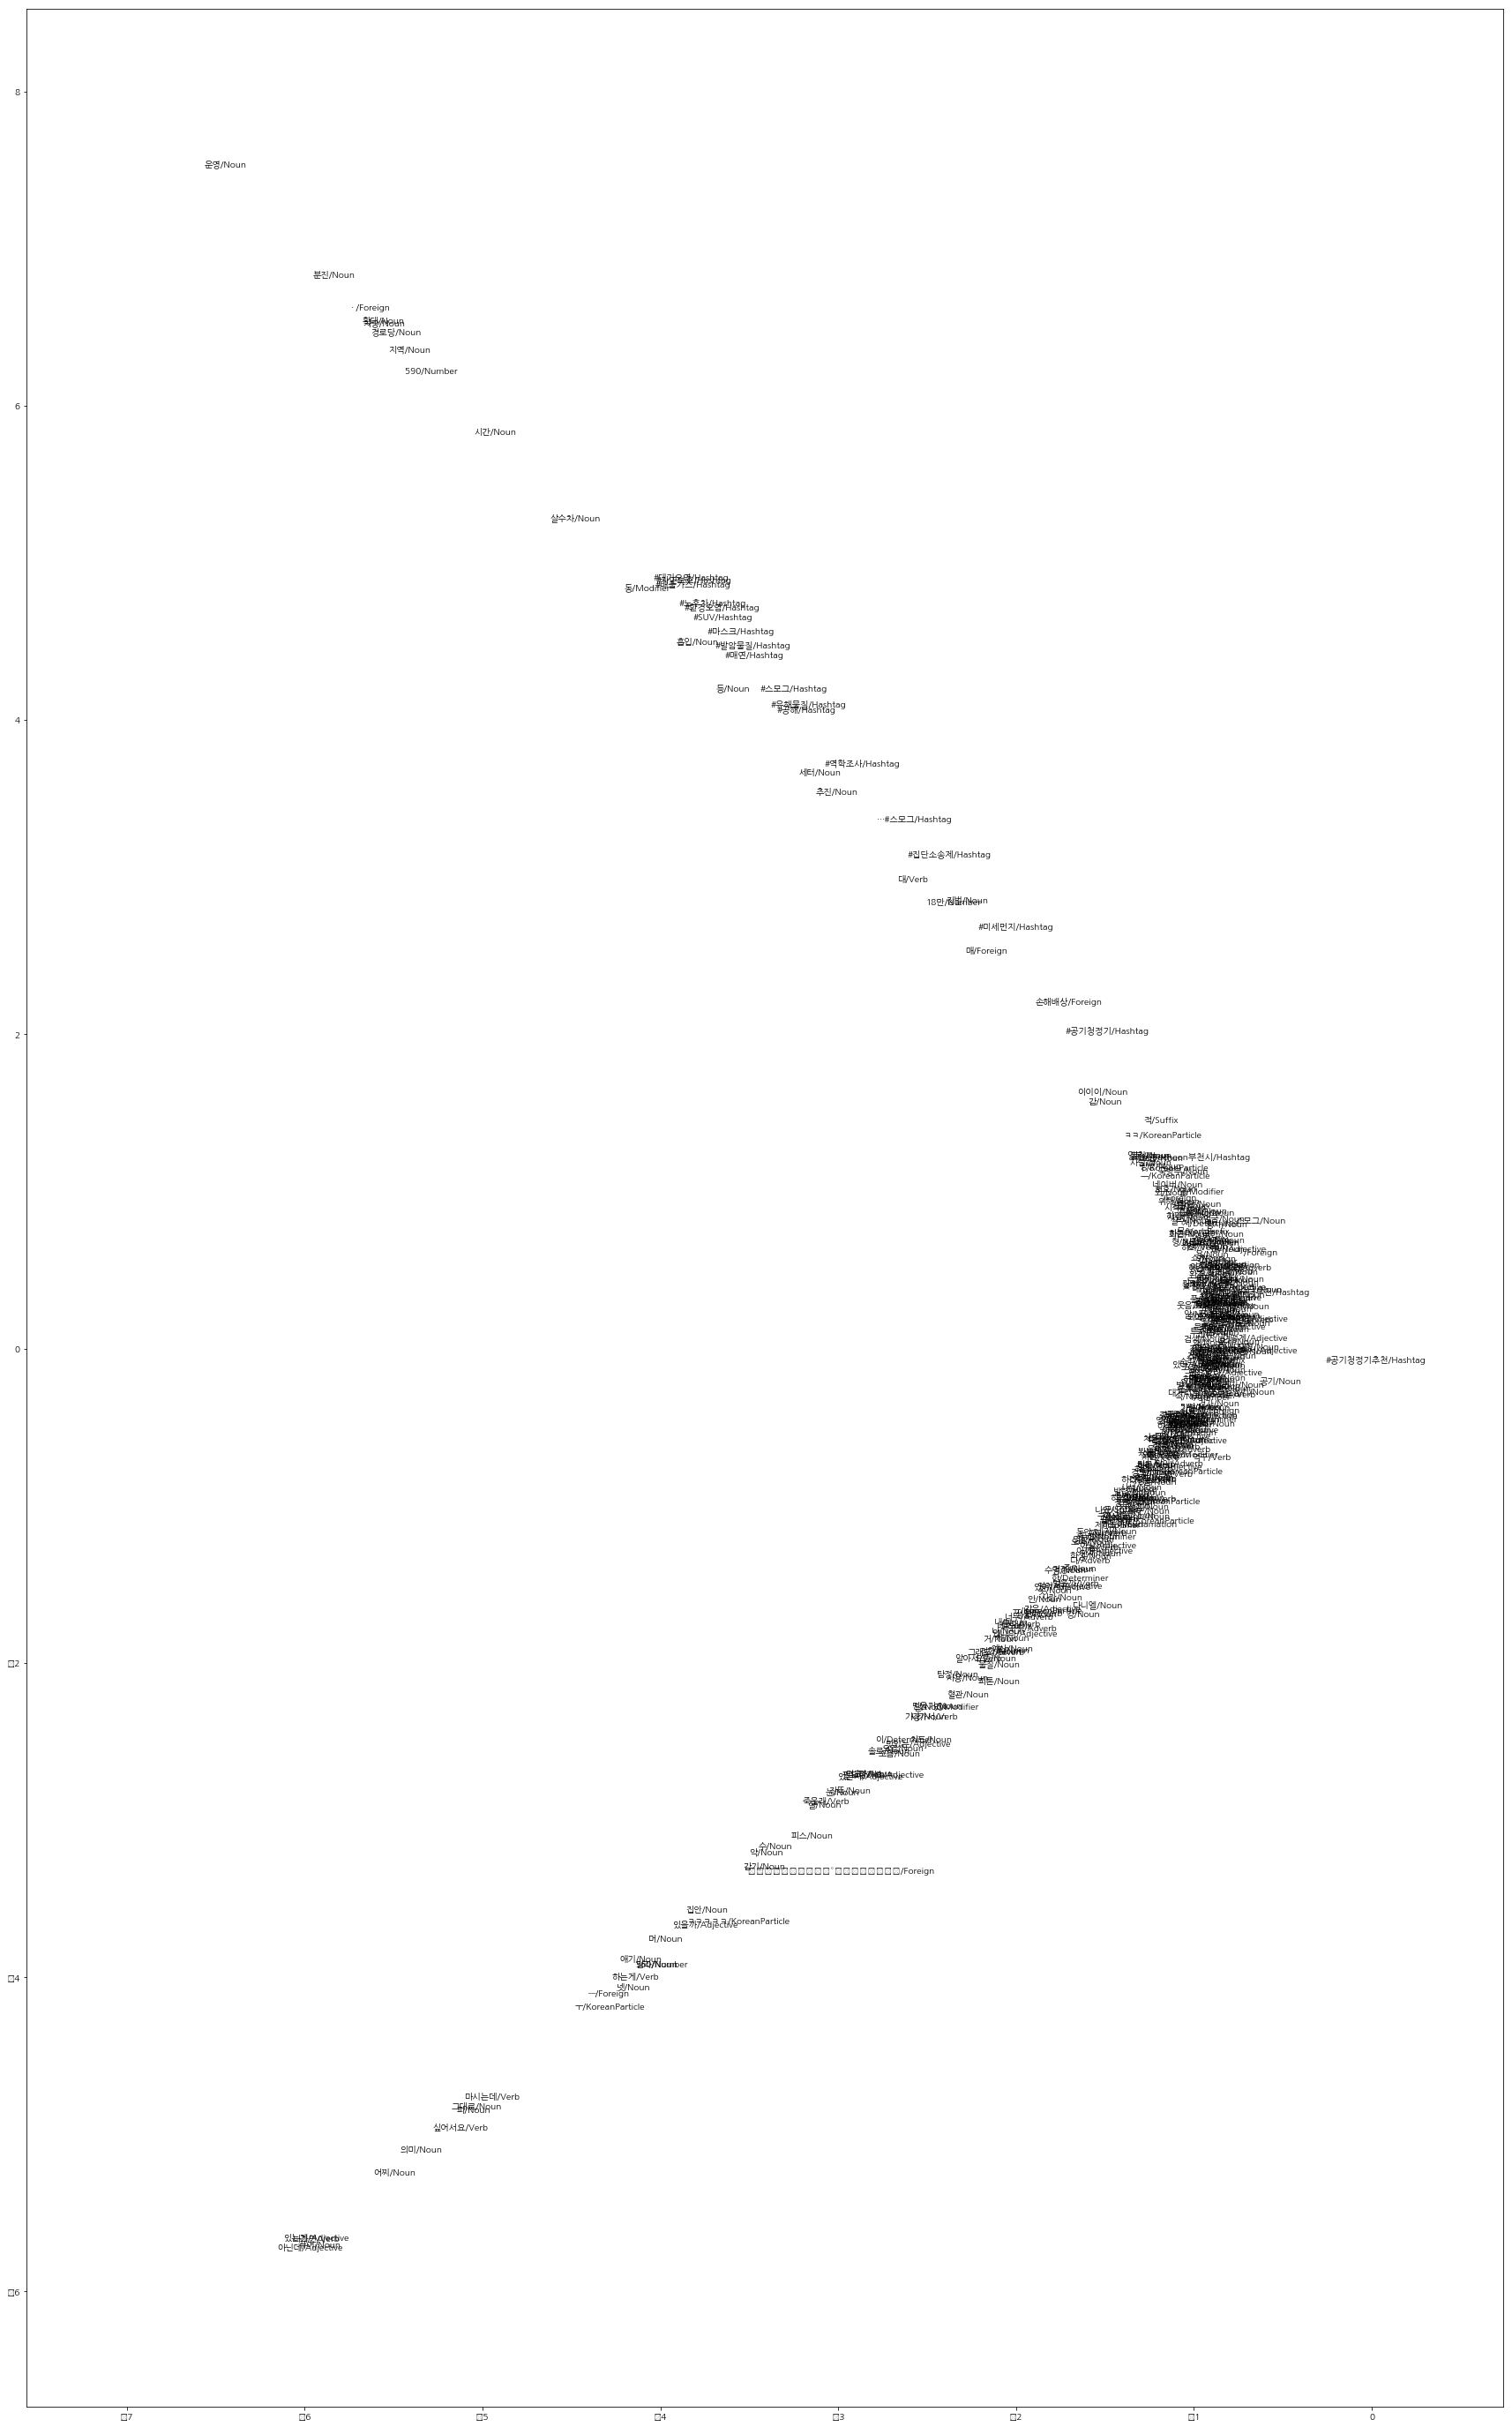

In [32]:


fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
# 차트 크기.
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [21]:
# 아쉬운대로 word cloud만들기
from wordcloud import WordCloud
from collections import Counter

In [22]:

text=""
for i in range((len(list_of_tweets))) :
    text+=(list_of_tweets[i].text)

In [23]:
#명사만 추출
def only_Noun(text):
    n_list = []
    for s in text.split('\n'):
        # 지정된 요소 아닌 것들만.
        n_list.extend([p[0] for p in twitter.pos(s) if (p[1] =="Noun")])
    return n_list

In [24]:
list_n=only_Noun(text)

In [25]:
list_n

['진짜',
 '나',
 '탈',
 '한국',
 '한국',
 '외국',
 '가면',
 '공부',
 '애',
 '이',
 '인간',
 '인간',
 '전',
 '한국',
 '교육',
 '열',
 '제발',
 '미세먼지',
 '교육청',
 '초등학교',
 '공기청정기',
 '중',
 '고등학교',
 '공기청정기',
 '중국산',
 '미세먼지',
 '샤오미',
 '공기청정기',
 '반중',
 '불매운동',
 '확산',
 '출처',
 '국민일보',
 '네이버',
 '시리얼',
 '머리',
 '말리',
 '바로',
 '가야',
 '얼굴',
 '부워',
 '얼굴',
 '무거',
 '웤',
 '미세먼지',
 '좀',
 '숨쉬기',
 '증말',
 '공기청정기',
 '비염',
 '필수',
 '생존',
 '템',
 '점막',
 '손상',
 '코피',
 '건가',
 '출혈',
 '콧구멍',
 '혈관',
 '어캐',
 '검열',
 '택배',
 '사람',
 '이번',
 '주',
 '배달',
 '물량중',
 '가장',
 '제품',
 '무엇',
 '요',
 '제',
 '가장',
 '마스크',
 '공기청정기',
 '미세먼지',
 '심각',
 '분',
 '시간',
 '좀더',
 '황사',
 '외부',
 '일',
 '건강',
 '유의',
 '박',
 '숭',
 '미세먼지',
 '페인트',
 '뉴스',
 '옥상',
 '양봉',
 '공기청정기',
 '설치',
 '하란',
 '사람',
 '짓',
 '대가리',
 '게',
 '게',
 '것',
 '이',
 '너른',
 '천지',
 '공기청정기',
 '미세먼지',
 '상식',
 '도저히',
 '이해',
 '그',
 '돈',
 '모든',
 '국민',
 '마스크',
 '배부',
 '게',
 '훨',
 '낫',
 '국민',
 '여러분',
 '미세먼지',
 '방독면',
 '쇼',
 '공기청정기',
 '쇼',
 '우리',
 '회사',
 '더',
 '공기청정기',
 '건물',
 '미세먼지',
 '잔뜩',
 '요즘',
 '목도',
 '안',
 '눈',
 '뭔가',


In [26]:
#추출된 명사 빈도 추출!
count = Counter(list_n)

In [27]:
wc = WordCloud(font_path="NanumGothic", background_color='white', width=800, height=600)

In [28]:
cloud = wc.generate_from_frequencies(dict(count))

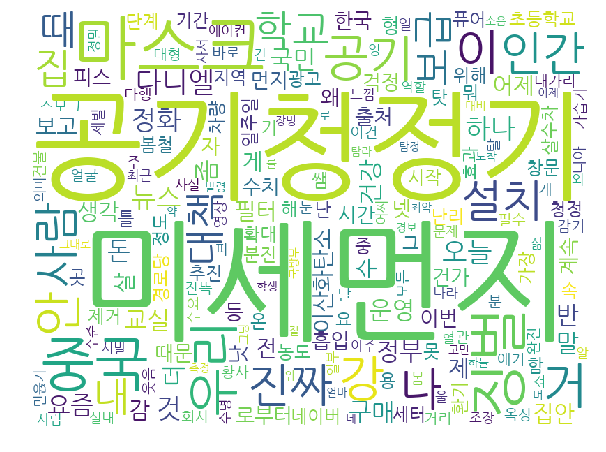

In [29]:
plt.figure(figsize=(10,8))
# 축 눈금자 x
plt.axis('off')
plt.imshow(cloud)